# **1. 서울 자전거 공유 수요 데이터셋**
[서울시의 공공자전거 대여]('https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing/data') 서비스인 ‘따릉이’의 대여 수요를 예측하는 문제에 사용되는 데이터셋입니다. 특정 시간대와 날씨, 요일, 공휴일 여부, 기온, 습도 등 다양한 데이터를 활용하여 자전거 대여 수요를 예측합니다.

# **2. 데이터셋 컬럼**
* Date : 연월일
* Rented Bike count - 매 시간마다 대여한 자전거 수
* Hour - 하루 중 시간
* Temperature - 온도
* Humidity - 습도 %
* Windspeed - 풍속 m/s
* Visibility - 가시거리 m
* Dew point temperature - 이슬점 온도
* Solar radiation - 태양 복사 MJ/m2
* Rainfall - 강우량 mm
* Snowfall - 적설량 cm
* Seasons - 겨울, 봄, 여름, 가을
* Holiday - 휴일/휴일 없음
* Functional Day - 운영되지 않았던 날, 정상적으로 운영된 날

# **3. 데이터 전처리 및 탐색적 데이터 분석 (EDA)**

In [3]:
# /content/drive/MyDrive/AI활용 소프트웨어 개발/10. 파이썬 웹 서비스/11. 데이터 분석/SeoulBikeData.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bike_df = pd.read_csv('/content/drive/MyDrive/AI활용 소프트웨어 개발/10. 파이썬 웹 서비스/11. 데이터 분석/SeoulBikeData.csv', encoding='CP949')
bike_df

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


※ CP949

- Microsoft Windows의 한국어 문자 인코딩입니다.
- EUC-KR을 확장한 형태로, 더 많은 한국어 문자(한자, 확장 문자 등)를 지원합니다.
- 주로 Windows 환경에서 저장된 한글 파일에서 사용됩니다.

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [5]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
bike_df.columns = ['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature',
       'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning Day']

In [8]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


<Axes: xlabel='Temperature', ylabel='Rented Bike Count'>

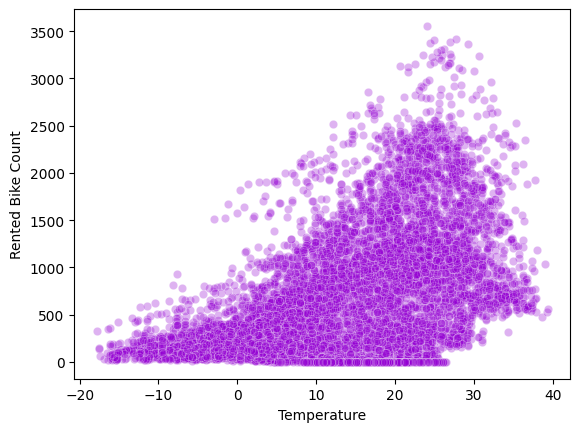

In [9]:
sns.scatterplot(x='Temperature', y='Rented Bike Count', data=bike_df, alpha=0.3, color='darkviolet')

<Axes: xlabel='Wind speed', ylabel='Rented Bike Count'>

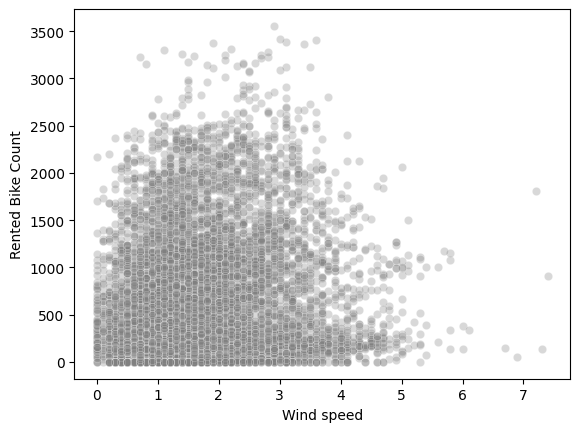

In [10]:
sns.scatterplot(x='Wind speed', y='Rented Bike Count', data=bike_df, alpha=0.3, color='gray')

<Axes: xlabel='Visibility', ylabel='Rented Bike Count'>

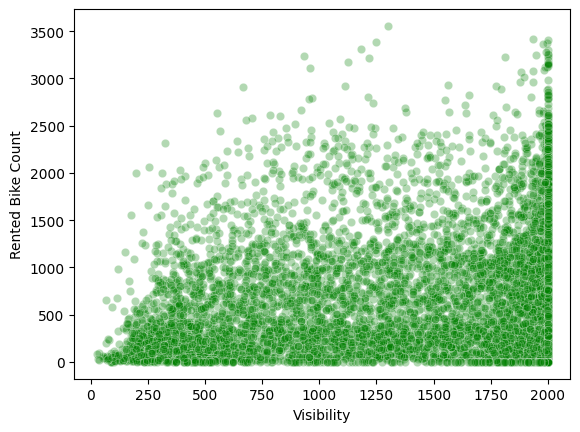

In [11]:
sns.scatterplot(x='Visibility', y='Rented Bike Count', data=bike_df, alpha=0.3, color='green')
# 숫자가 클 수록 멀리도 보여용~!

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

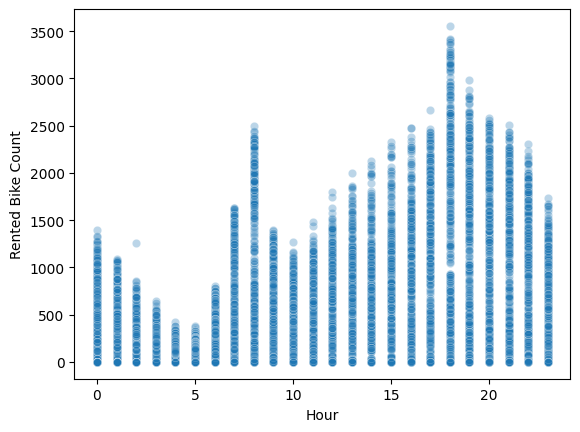

In [12]:
sns.scatterplot(x='Hour', y='Rented Bike Count', data=bike_df, alpha=0.3)

In [13]:
bike_df.isna().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature,0
Humidity,0
Wind speed,0
Visibility,0
Dew point temperature,0
Solar Radiation,0
Rainfall,0


In [14]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

In [15]:
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d/%m/%Y')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [16]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


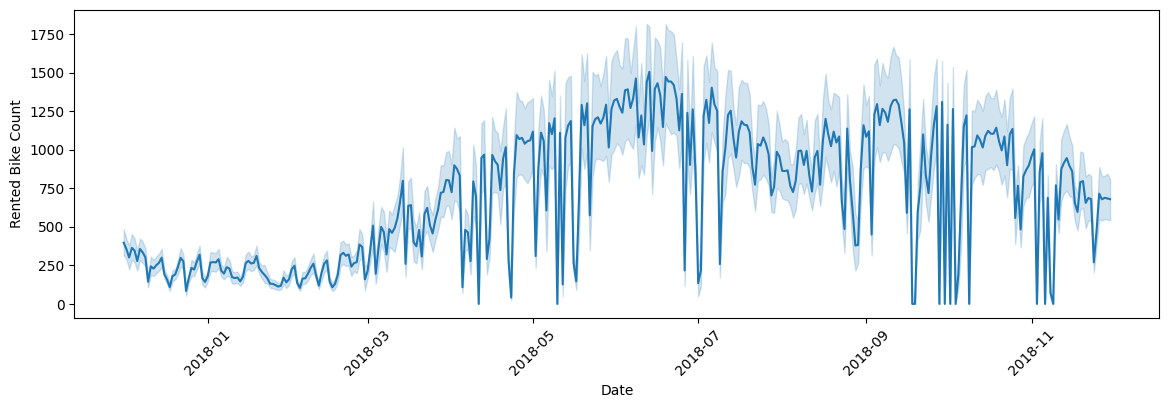

In [17]:
plt.figure(figsize=(14, 4))
sns.lineplot(x='Date', y='Rented Bike Count', data=bike_df)
plt.xticks(rotation=45)
plt.show()

In [18]:
bike_df[bike_df['year'] == 2017].groupby('month')['Rented Bike Count'].mean()

,Rented Bike Count
month,
12,249.099462


In [19]:
bike_df[bike_df['year'] == 2018].groupby('month')['Rented Bike Count'].mean()

,Rented Bike Count
month,
1,201.620968
2,225.941964
3,511.551075
4,728.093056
5,950.387097
6,1245.676389
7,987.177419
8,876.192204
9,935.572222


In [20]:
bike_df['TimeOfDay'] = pd.cut(bike_df['Hour'],
                            bins=[0, 5, 11, 17, 23],
                            labels=['Dawn', 'Morning', 'Afternoon', 'Evening'],
                            include_lowest=True) # 처음 시작 값은 포함시켜라

                            # Hour(0~23) 값을 네 개의 구간으로 나눠서, 각 시간대에 대응하는 이름(‘Dawn’, ‘Morning’, ‘Afternoon’, ‘Evening’)을 새 컬럼 TimeOfDay 에 지정

※ pd.cut()

pd.cut()은 숫자 데이터를 구간(bins)으로 나누어 범주형 데이터로 변환하는 데 사용됩니다. 주로 연속형 데이터를 특정 범주로 분류할 때 활용됩니다.

bins: 숫자 데이터를 나눌 경계값(구간)입니다.

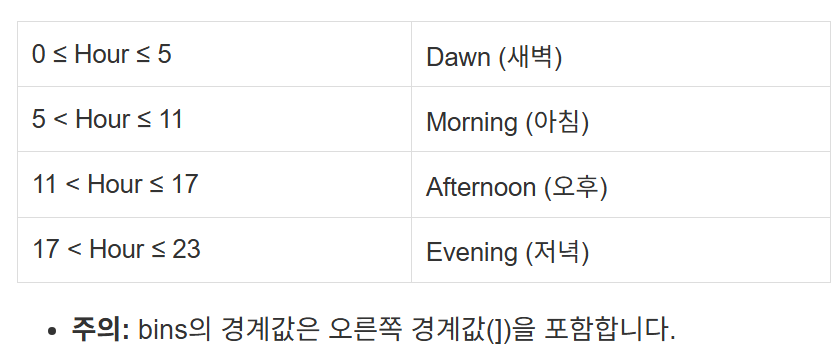

In [21]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day,TimeOfDay
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn


<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

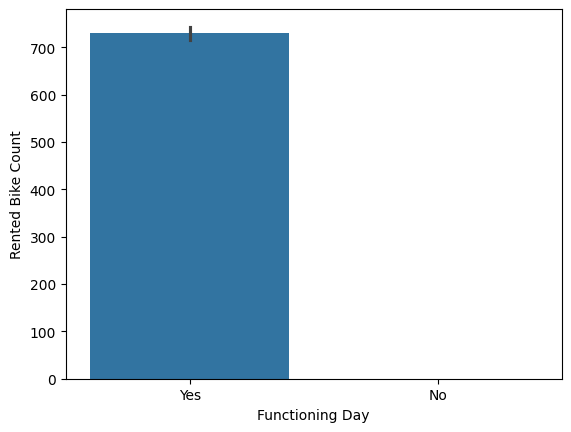

In [22]:
sns.barplot(x='Functioning Day', y='Rented Bike Count', data=bike_df)
# “그 그룹의 평균 대여량 추정치가 꽤 정확하다”는 뜻이에요. 즉, 운행일(Yes) 데이터가 충분히 많고 분산도 크지 않아서 ‘평균이 이 정도 범위 안에 있을 것이다’라고 확신할 수 있는 폭이 좁게 계산된 거죠.

※ barplot의 bar의 역할



- 신뢰구간(CI): 평균값이 속할 것으로 예상되는 값의 범위입니다.(막대 위의 검은 선)
- 바 그래프에서 신뢰구간: 검은색 심지(Error Bar)로 나타납니다.
- 신뢰구간이 좁다: 평균값에 대한 확신이 높다.
- 신뢰구간이 넓다: 평균값에 대한 확신이 낮고 데이터가 흩어져 있다.

In [23]:
bike_df['Functioning Day'].value_counts()

,count
Functioning Day,
Yes,8465
No,295


In [24]:
bike_df[bike_df['Functioning Day'] == 'Yes']

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day,TimeOfDay
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Evening
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Evening
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Evening
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Evening


In [25]:
bike_df[bike_df['Functioning Day'] == 'No']


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day,TimeOfDay
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4,11,Dawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Evening
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Evening
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Evening
8254,2018-11-09,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Evening


In [26]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [27]:
bike_df = bike_df.drop('Date', axis=1)
bike_df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day,TimeOfDay
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Dawn


In [28]:
bike_df.select_dtypes(exclude=['number']).columns.tolist()

['Seasons', 'Holiday', 'Functioning Day', 'TimeOfDay']

In [29]:
for i in bike_df.select_dtypes(exclude=['number']).columns.tolist():
    print(i, bike_df[i].nunique())

Seasons 4
Holiday 2
Functioning Day 2
TimeOfDay 4


In [30]:
bike_df = pd.get_dummies(bike_df, columns=bike_df.select_dtypes(exclude=['number']).columns.tolist(), drop_first=True)
# drop_first=True : 원핫인코딩된 첫 번째 컬럼 수를 drop해서 피쳐 수를 하나 줄이겠다. 이렇게 해도 모델이 이해하는 데 전혀 문제 되지 않음
bike_df.head() #첫번째인 Dawn이 사라짐

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,...,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,TimeOfDay_Morning,TimeOfDay_Afternoon,TimeOfDay_Evening
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,1,False,False,True,True,True,False,False,False


In [31]:
# 모든 컬럼 간 상관관계 분석
correlation_matrix = bike_df.corr()

# 목표 변수와의 상관관계만 확인
target_corr = correlation_matrix['Rented Bike Count'].sort_values(ascending=False) # 내림차순
print(target_corr)

Rented Bike Count        1.000000
Temperature              0.538558
Hour                     0.410257
Dew point temperature    0.379788
TimeOfDay_Evening        0.322978
Seasons_Summer           0.296549
Solar Radiation          0.261837
year                     0.215162
Functioning Day_Yes      0.203943
Visibility               0.199280
month                    0.133514
TimeOfDay_Afternoon      0.128639
Wind speed               0.121108
Holiday_No Holiday       0.072338
Seasons_Spring           0.022888
day                      0.022291
TimeOfDay_Morning       -0.081115
Rainfall                -0.123074
Snowfall                -0.141804
Humidity                -0.199780
Seasons_Winter          -0.424925
Name: Rented Bike Count, dtype: float64


### ※ corr() 함수

corr() 함수는 데이터프레임의 숫자형 열 간의 상관관계를 계산하는 데 사용됩니다.   
상관관계는 두 변수 간의 선형 관계를 나타내며, 주로 -1에서 1 사이의 값으로 표현됩니다.

- corr()는 Pearson 상관계수를 기본으로 사용합니다.
- 숫자형 열만 상관관계 분석에 포함됩니다.
- 높은 상관관계(>|0.5|): 강한 관계
- 낮은 상관관계(<|0.2|): 약한 관계

corr()를 사용하여 높은 상관관계를 가진 컬럼을 식별하고 제거할지 여부를 판단할 수 있습니다.  
 특히, 다중공선성(multicollinearity) 문제가 발생할 경우 머신러닝 모델의 성능이 저하될 수 있으므로, 상관관계가 높은 컬럼을 적절히 제거하는 것이 중요합니다.

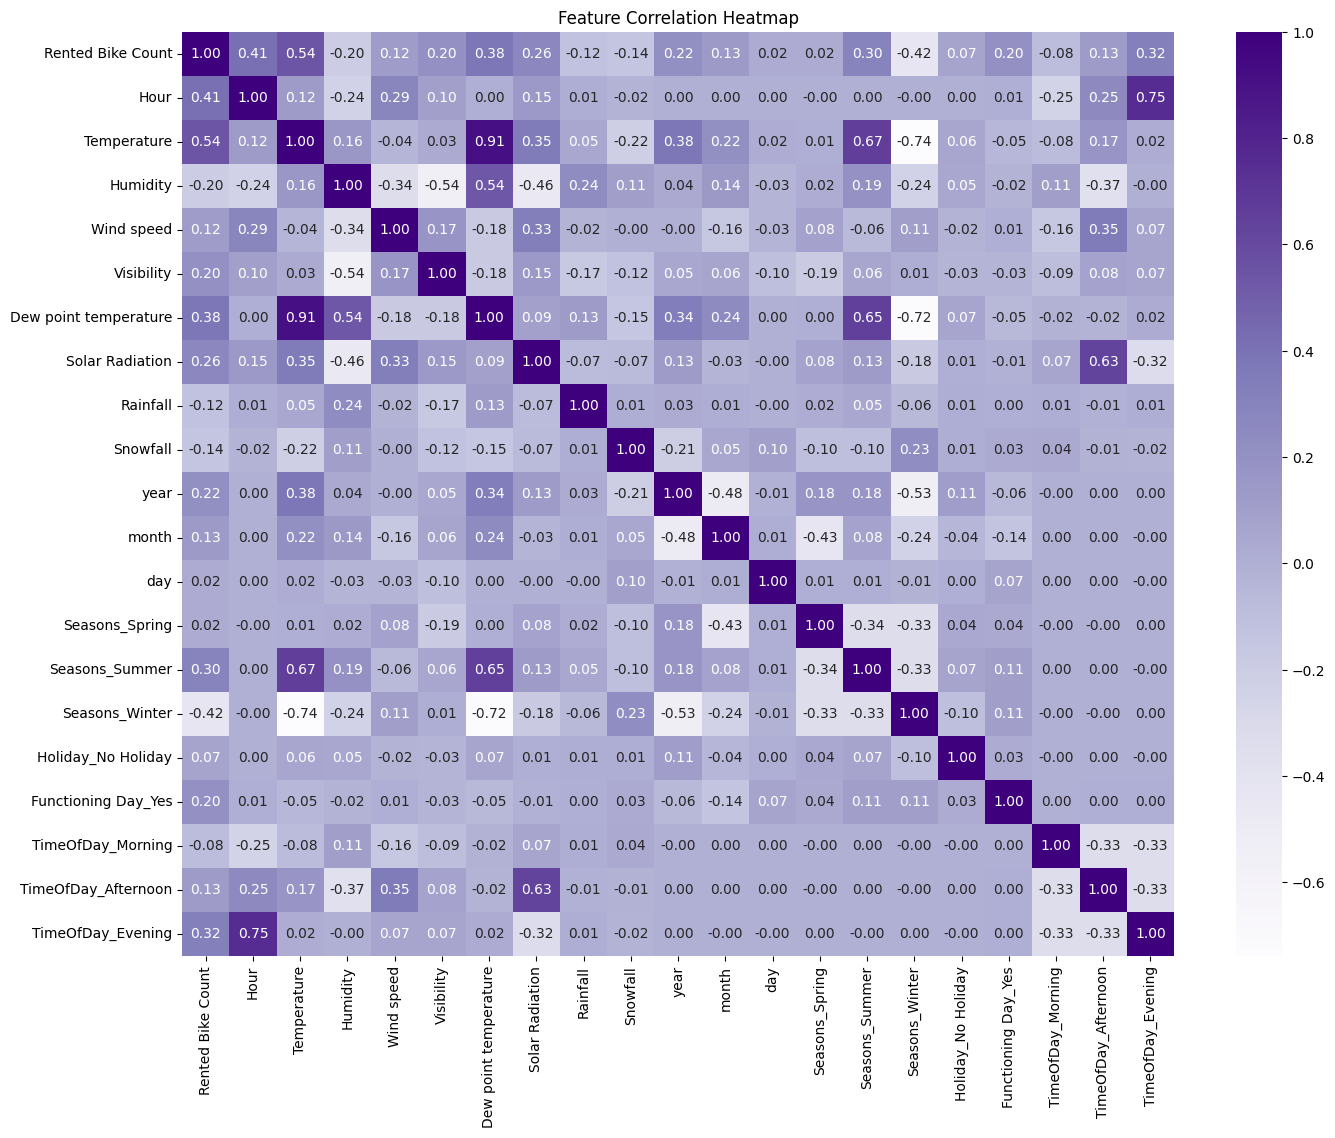

In [33]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Purples')
plt.title('Feature Correlation Heatmap')
plt.show()

In [34]:
bike_df = bike_df.drop(['Dew point temperature'], axis=1)
bike_df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,year,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,TimeOfDay_Morning,TimeOfDay_Afternoon,TimeOfDay_Evening
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,12,1,False,False,True,True,True,False,False,False


In [35]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented Bike Count    8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temperature          8760 non-null   float64
 3   Humidity             8760 non-null   int64  
 4   Wind speed           8760 non-null   float64
 5   Visibility           8760 non-null   int64  
 6   Solar Radiation      8760 non-null   float64
 7   Rainfall             8760 non-null   float64
 8   Snowfall             8760 non-null   float64
 9   year                 8760 non-null   int32  
 10  month                8760 non-null   int32  
 11  day                  8760 non-null   int32  
 12  Seasons_Spring       8760 non-null   bool   
 13  Seasons_Summer       8760 non-null   bool   
 14  Seasons_Winter       8760 non-null   bool   
 15  Holiday_No Holiday   8760 non-null   b

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bike_df.drop('Rented Bike Count', axis=1), bike_df['Rented Bike Count'], test_size=0.3, random_state=2025)

In [37]:
X_train.shape, y_train.shape

((6132, 19), (6132,))

In [38]:
X_test.shape, y_test.shape

((2628, 19), (2628,))

# **4. 결정 트리**

결정 트리(Decision Tree)는 데이터를 기반으로 의사결정을 수행하는 트리 구조의 예측 모델입니다.  
 루트 노드(root node)에서 시작해 각 노드는 특정 특성(feature)의 조건에 따라 가지(branch)로 분기되며, 최종적으로 리프 노드(leaf node)에 도달해 예측 결과(클래스나 값)를 도출합니다.  
  주로 분류(Classification)와 회귀(Regression) 문제에 사용되며, 데이터의 패턴을 직관적으로 시각화할 수 있어 해석이 용이합니다.  
   하지만 트리가 너무 깊어지면 과적합(overfitting) 문제가 발생할 수 있으므로 가지치기(pruning)나 최대 깊이 설정 등으로 제어해야 합니다.

- 전체 데이터셋을 하나의 노드로 시작합니다.
- 최적의 특성(feature)과 분할 기준(threshold)을 찾아 첫 번째 분할을 수행합니다.

- 분류 (Classification):
    - Gini 불순도(Gini Impurity)
        : 노드 안에 있는 샘플들이 얼마나 섞여 있는지
    - 엔트로피(Entropy) :노드 안의 정보(무질서도)가 얼마나 “혼란스러운지”
- 회귀 (Regression):
    - 평균 제곱 오차(Mean Squared Error, MSE)
    - 절대 평균 오차(Mean Absolute Error, MAE)

각 하위 노드에 대해 위 단계를 반복합니다.  

이 과정을 통해 트리는 여러 깊이로 성장합니다.
모든 노드가 더 이상 나눌 수 없거나 특정 조건(max_depth, min_samples_split)을 만족할 때까지 반복됩니다.  

더 이상 분할이 불가능할 때 리프 노드가 생성됩니다.  

>분류 문제: 가장 많은 클래스가 있는 클래스를 예측값으로 사용  
회귀 문제: 평균값을 예측값으로 사용

### ※ Gini 불순도 (Gini Impurity)

Gini 불순도는 한 노드에 있는 데이터의 순수도(Purity)를 측정하는 지표입니다.
한 노드에 있는 샘플들이 동일한 클래스에 속할 확률이 높을수록 Gini 불순도는 낮아집니다.
즉, 노드가 "얼마나 섞여 있는지"를 나타냅니다.  
### ※ 엔트로피 (Entropy)

엔트로피는 정보의 불확실성(혼란도, Uncertainty)을 측정합니다.
엔트로피가 높을수록 해당 노드에 있는 데이터는 더 섞여 있으며, 예측하기 어렵습니다.
엔트로피는 데이터가 균등하게 분포될 때 최대값을 가집니다.

둘 다 노드가 얼마나 섞였나 측정하는 도구  
실제 나무 만드는 과정에서 쓰기 편한 걸 고르면 된다.  
- 섞여있을수록 값이 커진다 -> 더 분할할 필요가 있다.
- 한 쪽으로 치우칠수록 값이 작아진다 -> 이미 순수하니 멈춰도 된다.

<Axes: xlabel='Rented Bike Count'>

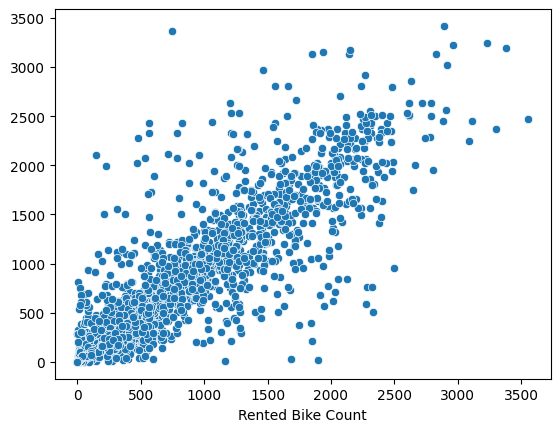

In [39]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=2025)
dtr.fit(X_train, y_train)
pred1 = dtr.predict(X_test)

sns.scatterplot(x=y_test, y=pred1)

In [40]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, pred1)

313.7826116872321

<Axes: xlabel='Rented Bike Count'>

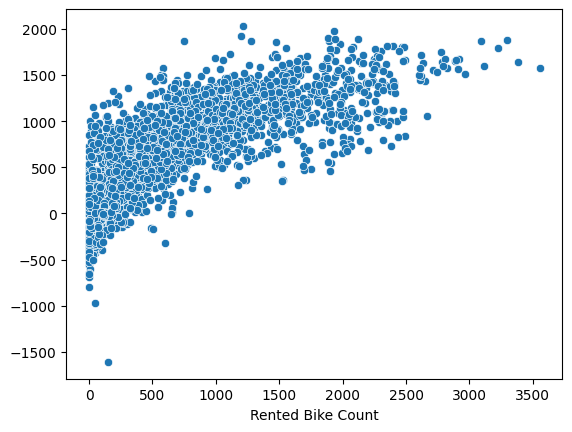

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred2 = lr.predict(X_test)

sns.scatterplot(x=y_test, y=pred2)

In [42]:
root_mean_squared_error(y_test, pred2)

420.7921510115953

In [43]:
# 하이퍼 파라미터 적용
dtr = DecisionTreeRegressor(random_state=2025, max_depth=50, min_samples_leaf=30)
dtr.fit(X_train, y_train)
pred3 = dtr.predict(X_test)

root_mean_squared_error(y_test, pred3)

293.44393572577195

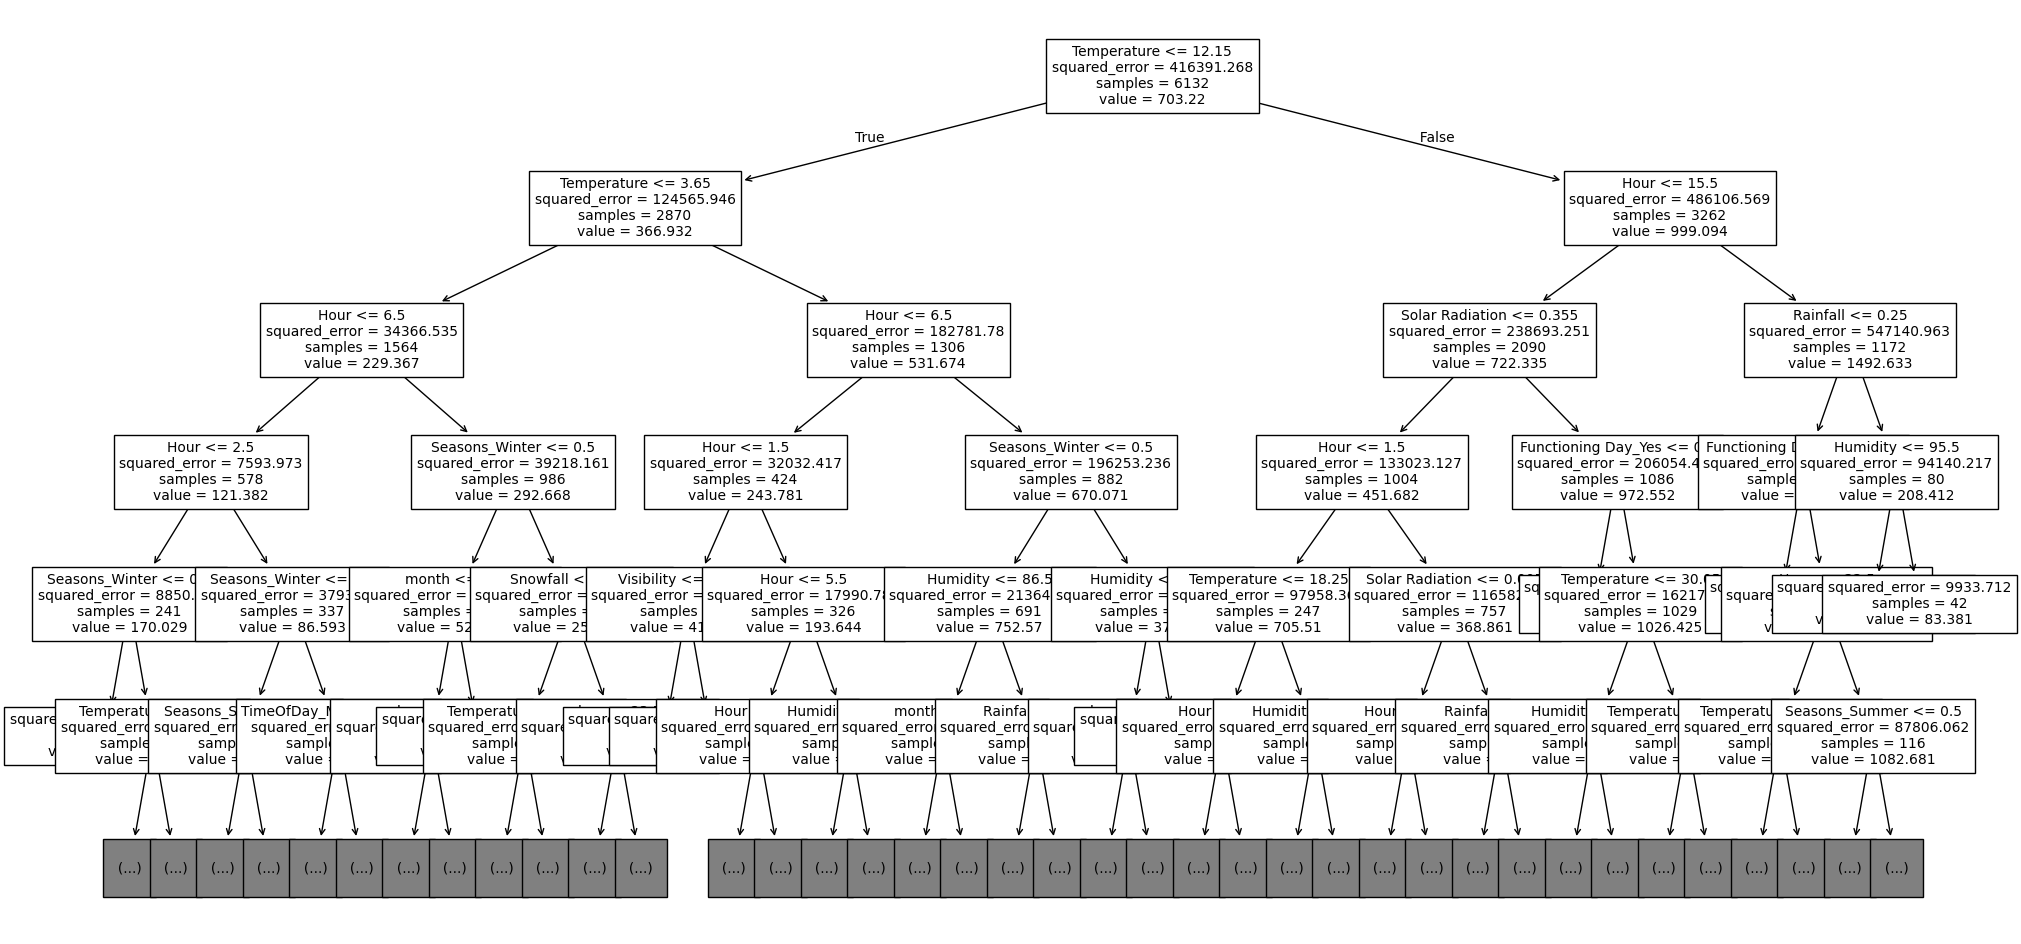

In [44]:
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 12))
plot_tree(dtr, max_depth=5, fontsize=10, feature_names=X_train.columns)
plt.show()

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=2025)
rf.fit(X_train, y_train)
pred4 = rf.predict(X_test)
root_mean_squared_error(y_test, pred4)

234.43573060707698

In [55]:
print("설정된 트리 개수 (n_estimators):", rf.n_estimators)
print("실제로 학습된 트리 수 (len(estimators_)):", len(rf.estimators_))

설정된 트리 개수 (n_estimators): 100
실제로 학습된 트리 수 (len(estimators_)): 100


In [46]:
rf.feature_importances_

array([0.2711775 , 0.32433855, 0.08286032, 0.01611289, 0.01597226,
       0.09191418, 0.0396052 , 0.00075289, 0.00041153, 0.02197947,
       0.01706343, 0.00169124, 0.00168268, 0.01549781, 0.0024369 ,
       0.08600034, 0.00221501, 0.00480898, 0.00347884])

In [47]:
feature_imp = pd.DataFrame({
    'features': X_train.columns,
    'importances': rf.feature_importances_
})

In [48]:
feature_imp

,features,importances
0,Hour,0.271178
1,Temperature,0.324339
2,Humidity,0.082860
3,Wind speed,0.016113
4,Visibility,0.015972
5,Solar Radiation,0.091914
6,Rainfall,0.039605
7,Snowfall,0.000753
8,year,0.000412
9,month,0.021979


In [49]:
top10 = feature_imp.sort_values('importances', ascending=False).head(10)
top10

,features,importances
1,Temperature,0.324339
0,Hour,0.271178
5,Solar Radiation,0.091914
15,Functioning Day_Yes,0.086000
2,Humidity,0.082860
6,Rainfall,0.039605
9,month,0.021979
10,day,0.017063
3,Wind speed,0.016113
4,Visibility,0.015972


<Axes: xlabel='importances', ylabel='features'>

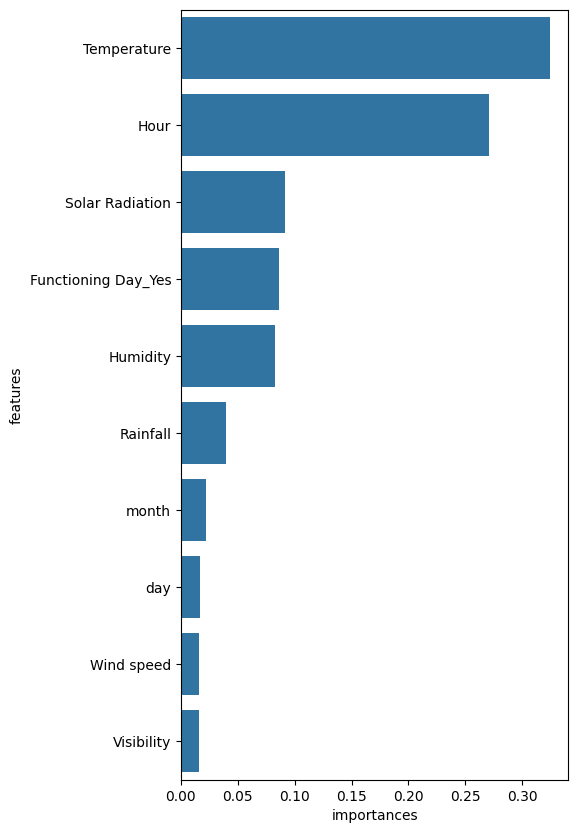

In [54]:
plt.figure(figsize=(5, 10))
sns.barplot(x='importances', y='features', data=top10)